In [ ]:
%matplotlib inline

# Assuming we are in the notebooks directory, we need to move one up:
%cd ..

from __future__ import print_function

import os
import us
import glob

import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt


In [3]:
state_name = 'NE'
best_path = glob.glob('./clustered/best_stats/' + state_name +'*')[0]
best_basename = os.path.basename(best_path)
filename, file_extension = os.path.splitext(best_basename)
state = gpd.read_file(glob.glob('./clustered/geojson_results/' + filename +'.geojson')[0])

In [9]:
state.head()

,Alpha,Beta,Centroid Latitude,Centroid Longitude,Cluster,Congressional District,GEOID,Predicted 2015 Population,geometry,id
0,4.0,0.8,32.656864,-114.573730,2,04,040270111071059,0.0,"POLYGON ((-114.574787 32.658824, -114.574627 3...",0
1,4.0,0.8,32.680474,-114.558543,2,04,040270111071017,0.0,"POLYGON ((-114.55146 32.676974, -114.553424 32...",1
2,4.0,0.8,32.683058,-114.578089,2,04,040270111071011,0.0,"POLYGON ((-114.572876 32.682073, -114.572874 3...",2
3,4.0,0.8,32.668830,-114.572710,2,04,040270111071078,0.0,"POLYGON ((-114.572764 32.667908, -114.572776 3...",3
4,4.0,0.8,32.669853,-114.573902,2,04,040270111071080,0.0,"POLYGON ((-114.574997 32.669982, -114.572837 3...",4


In [4]:
mini = state[['Predicted 2015 Population', 'geometry', 'Cluster', 'Congressional District', 'GEOID']]

In [5]:
mini['area'] = mini['geometry'].to_crs({'init': 'epsg:3395'}).map(lambda p: p.area / 10**6)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [6]:
# GEOID Structure is defined as
# STATE + COUNTY + TRACT + BLOCK = 2 + 3 + 6 + 4 = 15
# see: https://www.census.gov/geo/reference/geoidentifiers.html
def get_tract(row):
#     print(type(row['GEOID']))
    return row['GEOID'][5:11]
mini['Tract'] = mini.apply(get_tract, axis=1)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [7]:
mini.head()

,Predicted 2015 Population,geometry,Cluster,Congressional District,GEOID,area,Tract
0,6.981261,"POLYGON ((-98.35283899999999 40.468267, -98.35...",2,03,310019662001170,2.337829,966200
1,9.308348,"POLYGON ((-98.344453 40.463292, -98.3444339999...",2,03,310019662001177,5.543036,966200
2,8.144804,"POLYGON ((-98.345648 40.41786, -98.34701899999...",2,03,310019662001256,0.022388,966200
3,0.000000,"POLYGON ((-98.278132 40.379304, -98.279248 40....",2,03,310019662001301,1.261192,966200
4,0.000000,POLYGON ((-98.28971199999999 40.39379599999999...,2,03,310019662001291,1.925150,966200


In [8]:
tracts = mini.dissolve(by='Tract')

In [9]:
tracts.head()

,geometry,Predicted 2015 Population,Cluster,Congressional District,GEOID,area
Tract,,,,,,
000100,"(POLYGON ((-96.62487299999999 40.851498, -96.6...",0.000000,2,03,310790001002545,0.002221
000200,"(POLYGON ((-98.337802 40.92875799999999, -98.3...",5.485362,0,02,310550002003007,0.719727
000201,"POLYGON ((-96.630482 40.835202, -96.631805 40....",32.634335,1,01,311090002012005,0.023366
000202,"POLYGON ((-96.64413399999999 40.835286, -96.64...",6.765045,1,01,311090002022003,0.014139
000300,"(POLYGON ((-96.67281 40.837338, -96.67281 40.8...",20.496894,0,02,310550003003008,0.053909


In [10]:
mini = mini[['Predicted 2015 Population', 'area', 'Tract']]

In [11]:
mini.head()

,Predicted 2015 Population,area,Tract
0,6.981261,2.337829,966200
1,9.308348,5.543036,966200
2,8.144804,0.022388,966200
3,0.000000,1.261192,966200
4,0.000000,1.925150,966200


In [12]:
pop = mini.groupby('Tract').sum()
pop['Tract'] = pop.index

pop.head()


,Predicted 2015 Population,area,Tract
Tract,,,
000100,7914.0,1047.574323,000100
000200,11745.0,147.151597,000200
000201,4477.0,4.451763,000201
000202,4268.0,2.467815,000202
000300,15480.0,4945.751457,000300


In [13]:
del tracts['Predicted 2015 Population']

In [14]:
del tracts['area']

In [15]:
tracts['Tract'] = tracts.index

In [16]:
tracts.head()

,geometry,Cluster,Congressional District,GEOID,Tract
Tract,,,,,
000100,"(POLYGON ((-96.62487299999999 40.851498, -96.6...",2,03,310790001002545,000100
000200,"(POLYGON ((-98.337802 40.92875799999999, -98.3...",0,02,310550002003007,000200
000201,"POLYGON ((-96.630482 40.835202, -96.631805 40....",1,01,311090002012005,000201
000202,"POLYGON ((-96.64413399999999 40.835286, -96.64...",1,01,311090002022003,000202
000300,"(POLYGON ((-96.67281 40.837338, -96.67281 40.8...",0,02,310550003003008,000300


In [17]:
tracts = tracts.merge(pop, on='Tract')

In [18]:
tracts['Population per square km'] = tracts['Predicted 2015 Population'] / tracts['area'] 

In [20]:
tracts.head()

,geometry,Cluster,Congressional District,GEOID,Tract,Predicted 2015 Population,area,Population per square km
0,"(POLYGON ((-96.62487299999999 40.851498, -96.6...",2,03,310790001002545,000100,7914.0,1047.574323,7.554595
1,"(POLYGON ((-98.337802 40.92875799999999, -98.3...",0,02,310550002003007,000200,11745.0,147.151597,79.815648
2,"POLYGON ((-96.630482 40.835202, -96.631805 40....",1,01,311090002012005,000201,4477.0,4.451763,1005.669043
3,"POLYGON ((-96.64413399999999 40.835286, -96.64...",1,01,311090002022003,000202,4268.0,2.467815,1729.465287
4,"(POLYGON ((-96.67281 40.837338, -96.67281 40.8...",0,02,310550003003008,000300,15480.0,4945.751457,3.129959


In [22]:
tracts.to_file('./fig/shapefile/results/pop_nebraska_by_tract.shp', driver="ESRI Shapefile")

In [11]:
az_ne_cities = az_ne_cities[(az_ne_cities['NAME'] == 'Tucson') | (az_ne_cities['NAME'] == 'Phoenix') |  (az_ne_cities['NAME'] == 'Omaha')]

In [12]:
az_ne_cities

,ANSICODE,COUNTY,COUNTYFIPS,ELEV_IN_FT,ELEV_IN_M,FEATURE,FEATURE2,GNIS_ID,LATITUDE,LONGITUDE,NAME,POP_2010,PopPlLat,PopPlLong,STATE,STATE_FIPS,geometry
9315,2396064,Douglas,055,1060.0,323.0,Civil,County Seat,835483.0,41.258610,-95.937792,Omaha,408958.0,41.258610,-95.937792,NE,31,POINT (-95.93779199999994 41.25860960000006)
20569,2411414,Maricopa,013,1086.0,331.0,Civil,State Capital County Seat,44784.0,33.448377,-112.074037,Phoenix,1445632.0,33.448377,-112.074037,AZ,04,POINT (-112.0740373 33.44837710000013)
22102,2412104,Pima,019,2490.0,759.0,Civil,County Seat,43534.0,32.221743,-110.926479,Tucson,520116.0,32.221743,-110.926479,AZ,04,POINT (-110.926479 32.22174290000009)


In [13]:
az_ne_cities.to_file('./fig/shapefile/cities/az_ne_cities.shp', driver="ESRI Shapefile")

In [14]:
from default_values import usa_shapefile_path
usa = gpd.read_file(usa_shapefile_path)

In [15]:
us.states.lookup('NE').fips
us.states.lookup('AZ').fips


u'04'

In [16]:
az_ne_cong_dist = usa[(usa['STATEFP'].apply(int) == int(us.states.lookup('NE').fips)) |
    (usa['STATEFP'].apply(int) == int(us.states.lookup('AZ').fips))]

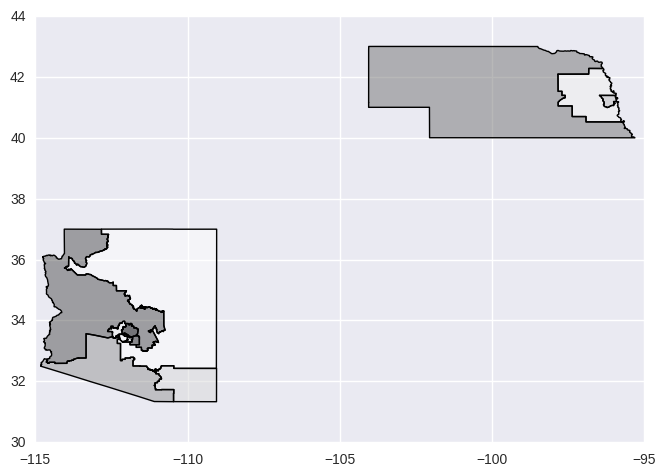

In [17]:
az_ne_cong_dist.plot()

In [18]:
az_ne_cong_dist.to_file('./fig/shapefile/cong_dist/az_ne_cong_dist.shp', driver="ESRI Shapefile")